# Linear regression project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the final version of the Ames_Housing_Data dataset and create a linear regression model that will predict the sale price of houses.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Final dataset to be used

ames_df = pd.read_csv("data/AMES_final_df.csv")
ames_df.head()

,Unnamed: 0,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,1,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,2,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,4,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Separate the features and the column to predict

X = ames_df.drop('SalePrice', axis=1)
y = ames_df['SalePrice']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

### Scaling the features

Since the features have a variety of scales and units, we need to scale them. This will help us get better performance.

The dataset will fit only the training set. We then transform the data for both the training and test sets.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Creating models

Let's make three different models and compare their performance. Those models are: basic Linear Regression, Ridge Regression and Lasso regression. Both Ridge and Lasso are regularizations techniques that aim to minimize the adjusted loss function and prevent overfitting or underfitting.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

linear_model = LinearRegression()
ridge_model = Ridge(alpha=10)
lasso_model = Lasso(alpha=10)

# Fitting the model to the scaled training set
linear_model.fit(scaled_X_train, y_train)
ridge_model.fit(scaled_X_train, y_train)
lasso_model.fit(scaled_X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [7]:
# Predicting the test set
linear_y_pred = linear_model.predict(scaled_X_test)
ridge_y_pred = ridge_model.predict(scaled_X_test)
lasso_y_pred = lasso_model.predict(scaled_X_test)

In [8]:
# Calculating metrics to compare the models
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_MAE = mean_absolute_error(y_test, linear_y_pred)
linear_MSE = mean_squared_error(y_test, linear_y_pred)
linear_RMSE = np.sqrt(linear_MSE)

ridge_MAE = mean_absolute_error(y_test, ridge_y_pred)
ridge_MSE = mean_squared_error(y_test, ridge_y_pred)
ridge_RMSE = np.sqrt(ridge_MSE)

lasso_MAE = mean_absolute_error(y_test, lasso_y_pred)
lasso_MSE = mean_squared_error(y_test, lasso_y_pred)
lasso_RMSE = np.sqrt(lasso_MSE)

print(f"Linear MAE {linear_MAE}\nLinear RMSE {linear_RMSE} \n")
print(f"Ridge MAE {ridge_MAE}\nRidge RMSE {ridge_RMSE} \n")
print(f"Lasso MAE {lasso_MAE}\nLasso RMSE {lasso_RMSE}")

Linear MAE 1213695152396063.8
Linear RMSE 2.0515764366865348e+16 

Ridge MAE 15044.912510657763
Ridge RMSE 22043.413489824477 

Lasso MAE 15080.00573158548
Lasso RMSE 22311.26496069566


### Plotting residuals

Let's plot the residuals to see how good is the model.

In [9]:
linear_residuals = y_test - linear_y_pred
ridge_residuals = y_test - ridge_y_pred
lasso_residuals = y_test - lasso_y_pred

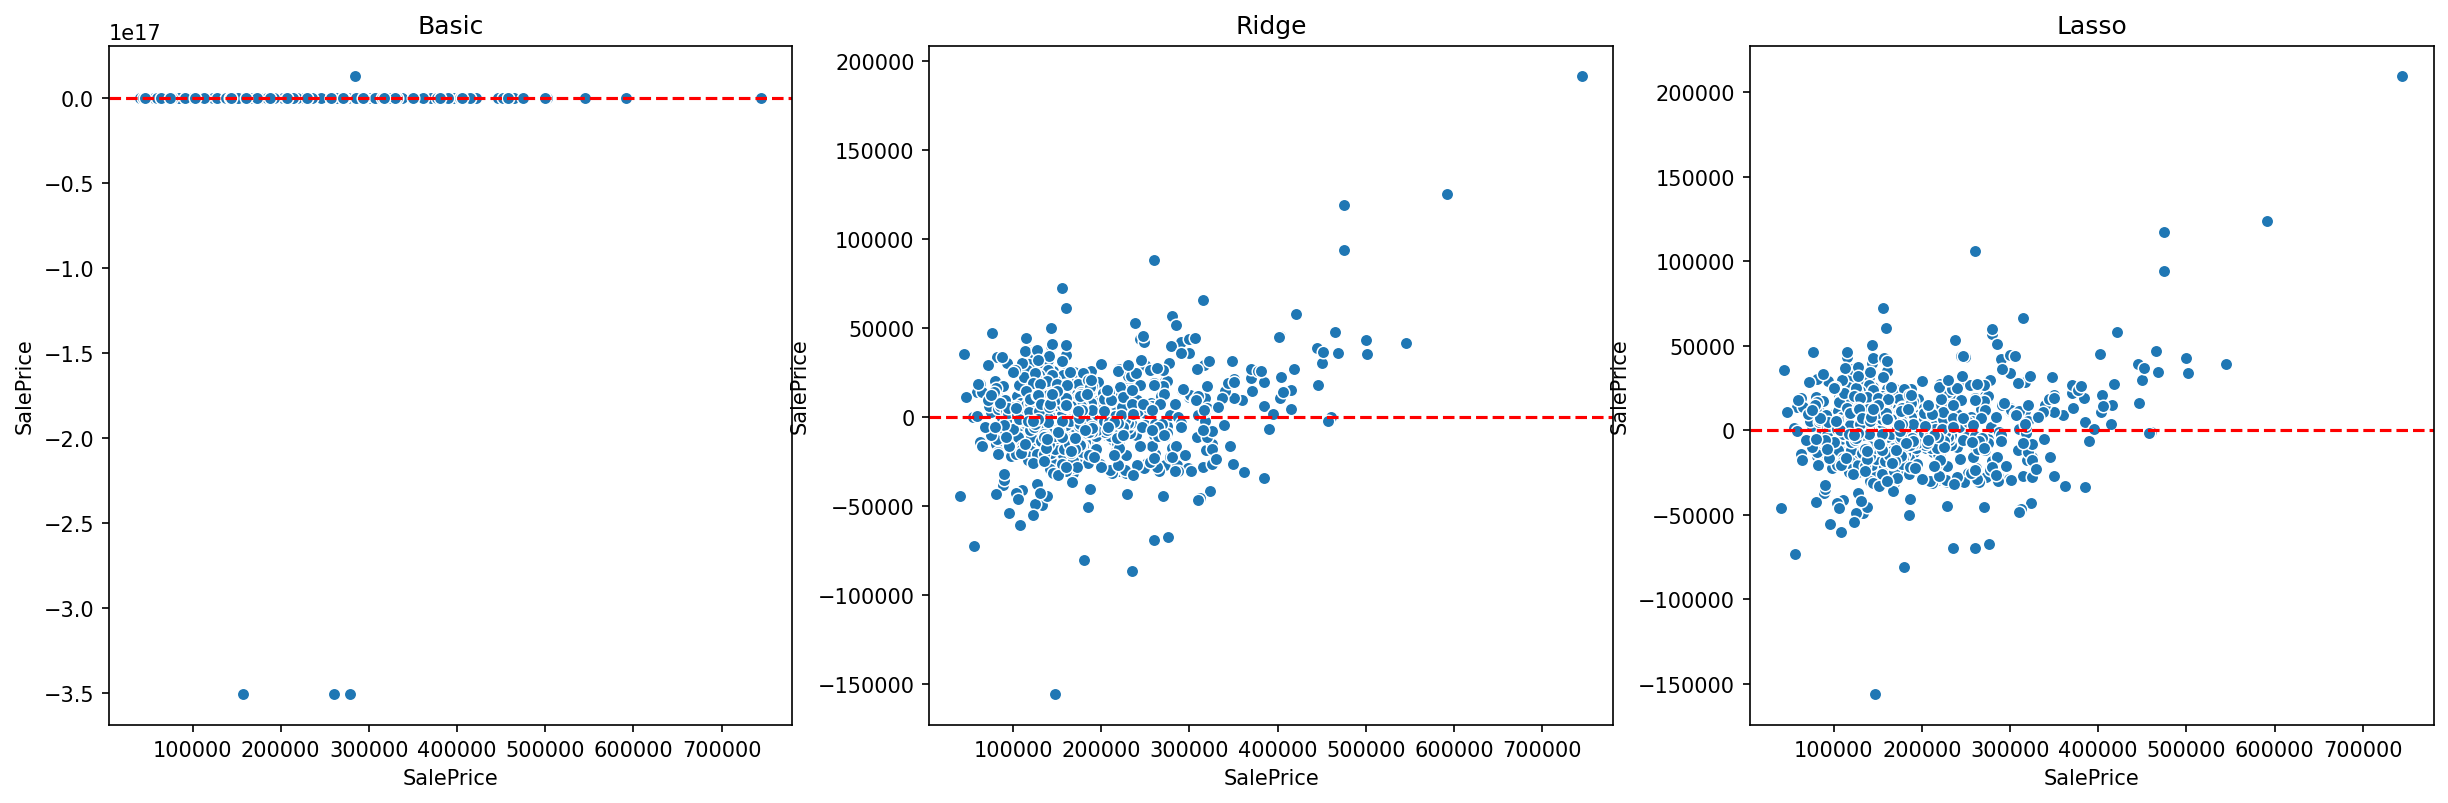

In [10]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)
sns.scatterplot(ax=axes[0], x=y_test, y=linear_residuals)
sns.scatterplot(ax=axes[1], x=y_test, y=ridge_residuals)
sns.scatterplot(ax=axes[2], x=y_test, y=lasso_residuals)

axes[0].set_title("Basic")
axes[1].set_title("Ridge")
axes[2].set_title("Lasso")

axes[0].axhline(y=0, color='r', linestyle='--')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[2].axhline(y=0, color='r', linestyle='--')

Text(0.5, 1.0, 'Lasso')

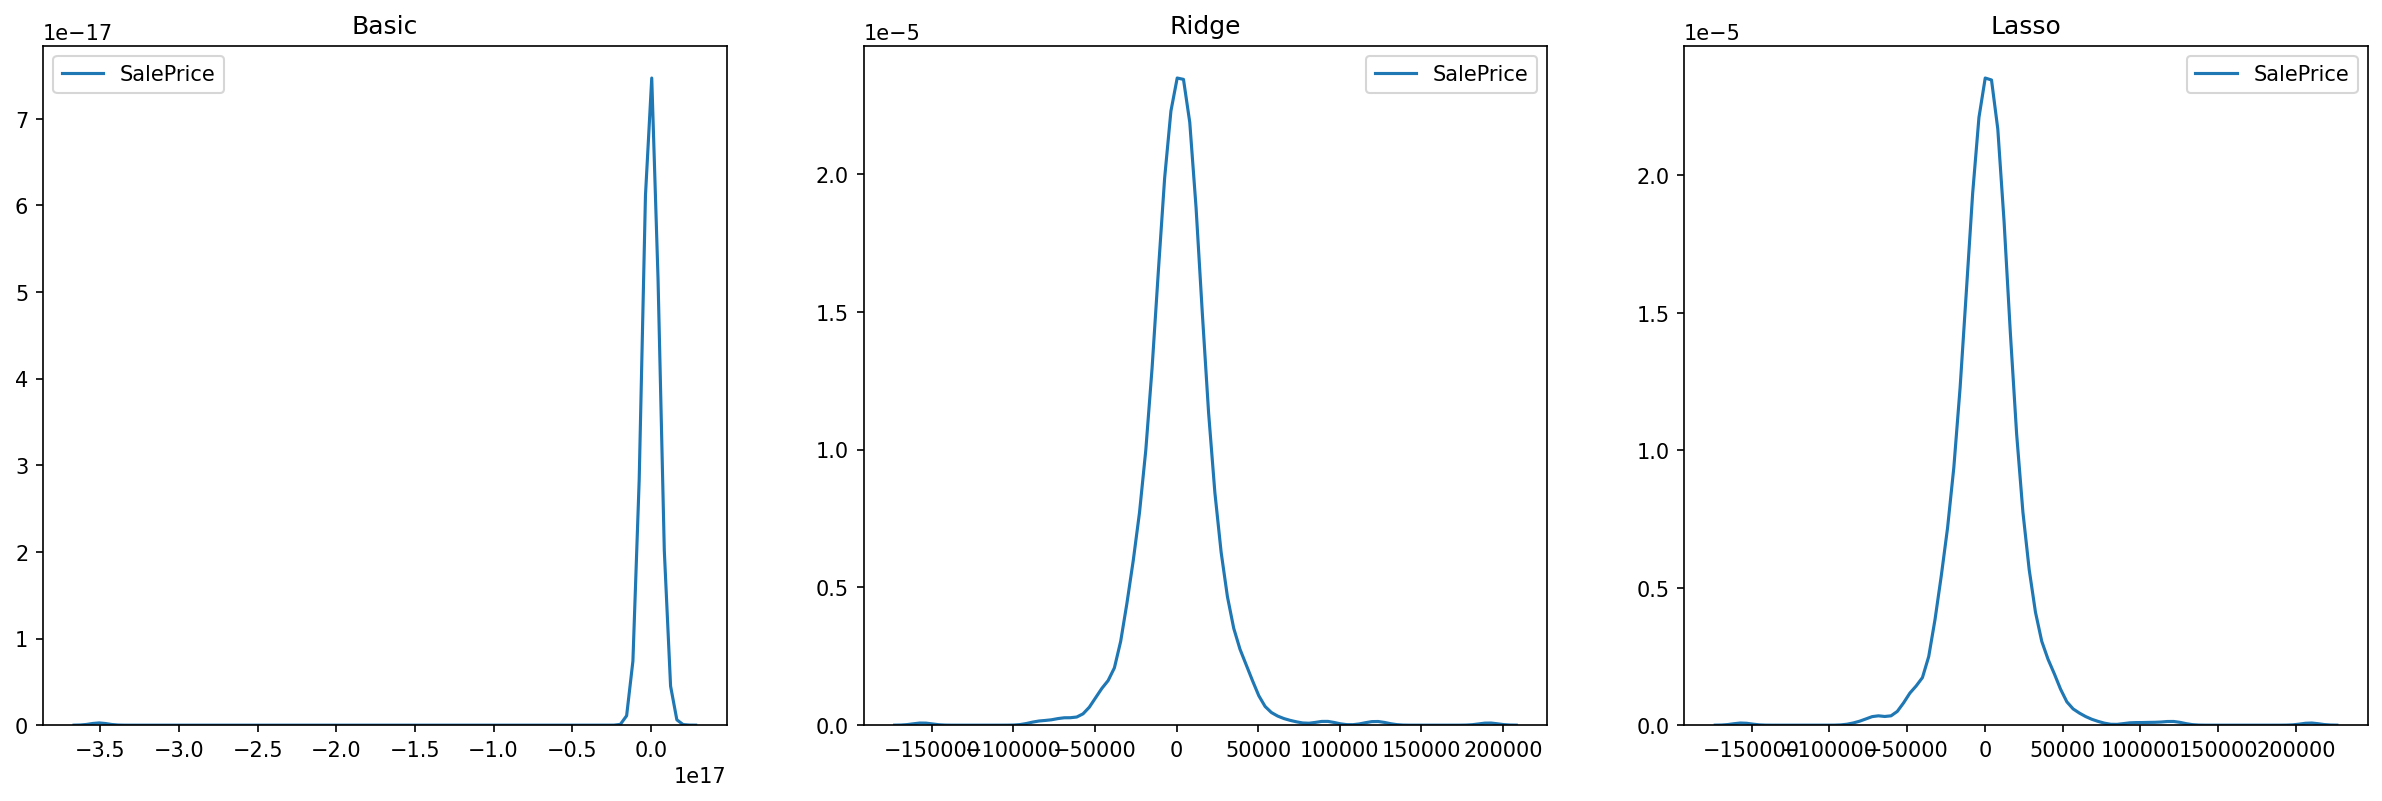

In [11]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)

sns.kdeplot(ax=axes[0], data=linear_residuals)
sns.kdeplot(ax=axes[1], data=ridge_residuals)
sns.kdeplot(ax=axes[2], data=lasso_residuals)

axes[0].set_title("Basic")
axes[1].set_title("Ridge")
axes[2].set_title("Lasso")

Let's check against the normal probability plot.

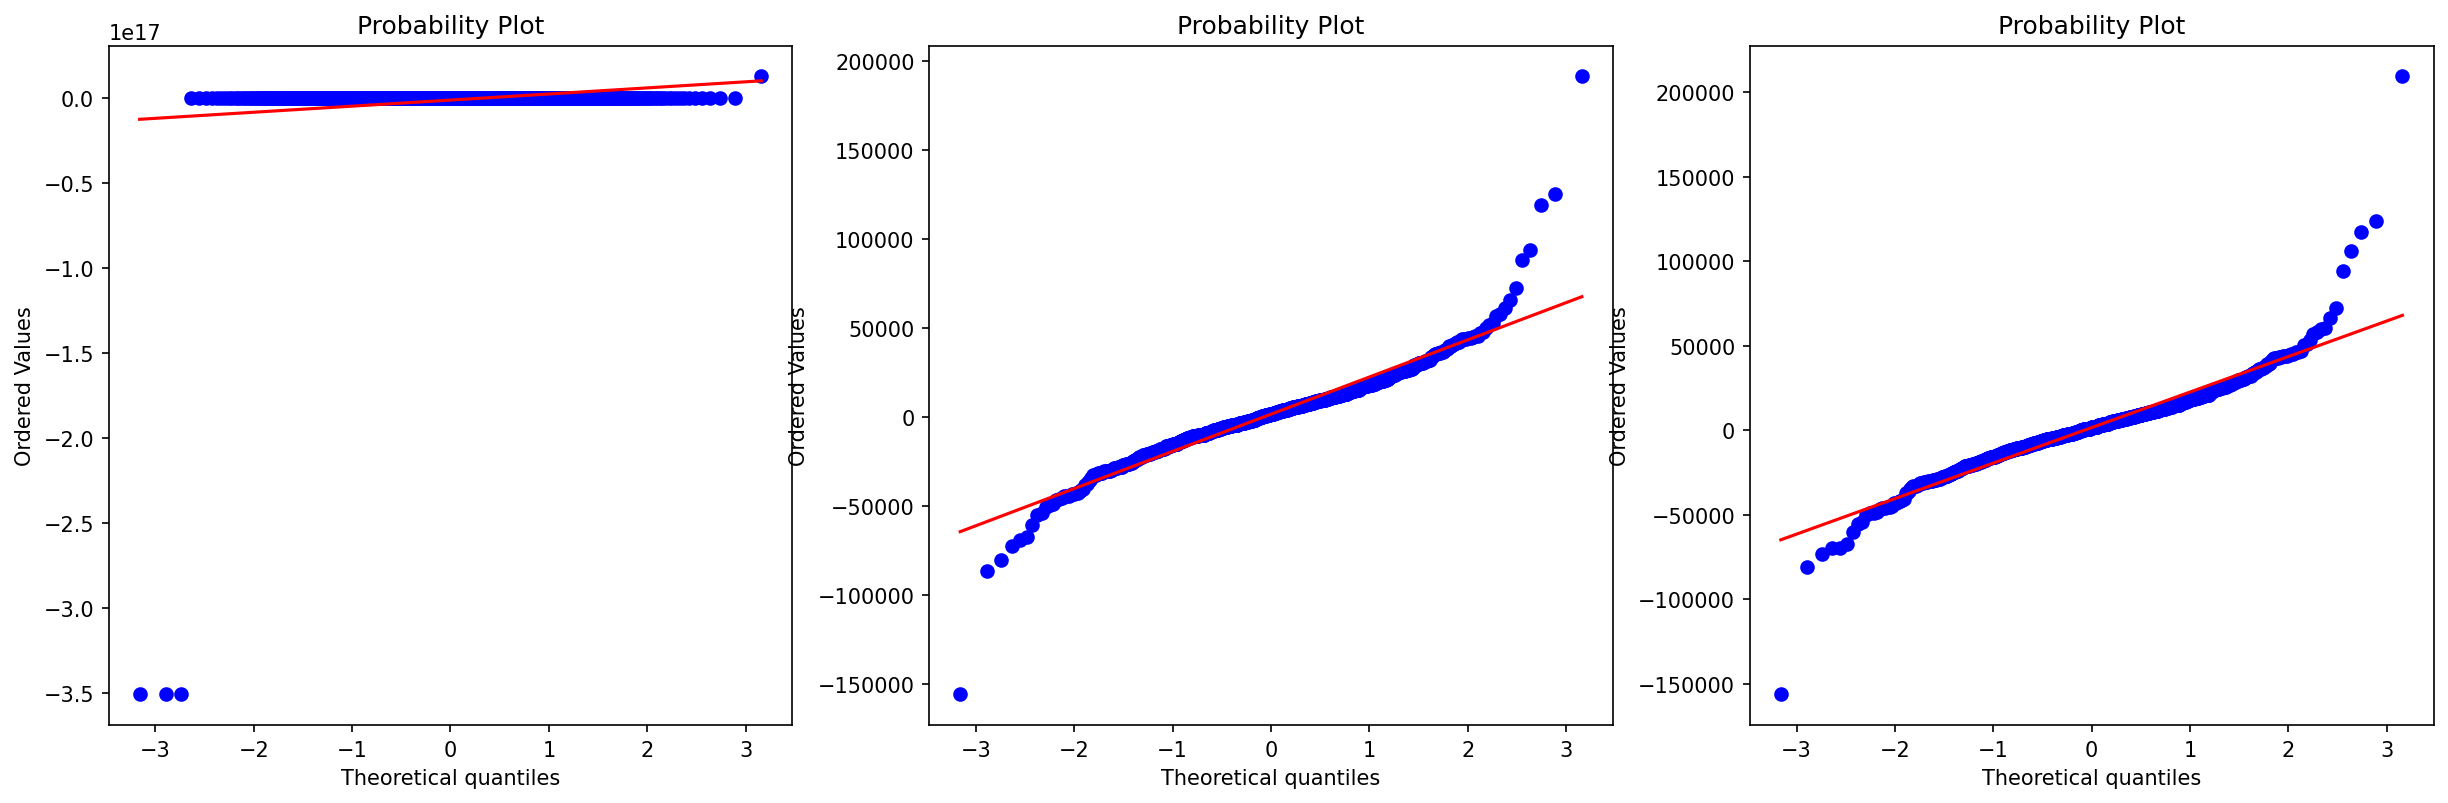

In [12]:
import scipy as sp

fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)
_ = sp.stats.probplot(linear_residuals, plot=axes[0])
_ = sp.stats.probplot(ridge_residuals, plot=axes[1])
_ = sp.stats.probplot(lasso_residuals, plot=axes[2])

Clearly, the Ridge and Lasso models perform better than the basic linear regression model.

Perhaps we can have better results with a combination of the two. Let's make a model of ElasticNet, testing different hyperparameters with the help of GridSearchCV.

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elasticnet_model = ElasticNet()
parameters_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
                   'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}

grid_model = GridSearchCV(estimator=base_elasticnet_model,
                          param_grid=parameters_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)

In [14]:
import warnings
warnings.filterwarnings('ignore') 

grid_model.fit(scaled_X_train, y_train)
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [15]:
grid_y_pred = grid_model.predict(scaled_X_test)

grid_MAE = mean_absolute_error(y_test, grid_y_pred)
grid_MSE = mean_squared_error(y_test, grid_y_pred)
grid_RMSE = np.sqrt(grid_MSE)

print(f"Ridge MAE {ridge_MAE}\nRidge RMSE {ridge_RMSE} \n")
print(f"Lasso MAE {lasso_MAE}\nLasso RMSE {lasso_RMSE} \n")
print(f"Grid MAE {grid_MAE}\nGrid RMSE {grid_RMSE}")

Ridge MAE 15044.912510657763
Ridge RMSE 22043.413489824477 

Lasso MAE 15080.00573158548
Lasso RMSE 22311.26496069566 

Grid MAE 14671.994335533656
Grid RMSE 21448.278158226087


In [16]:
grid_residuals = y_test - grid_y_pred

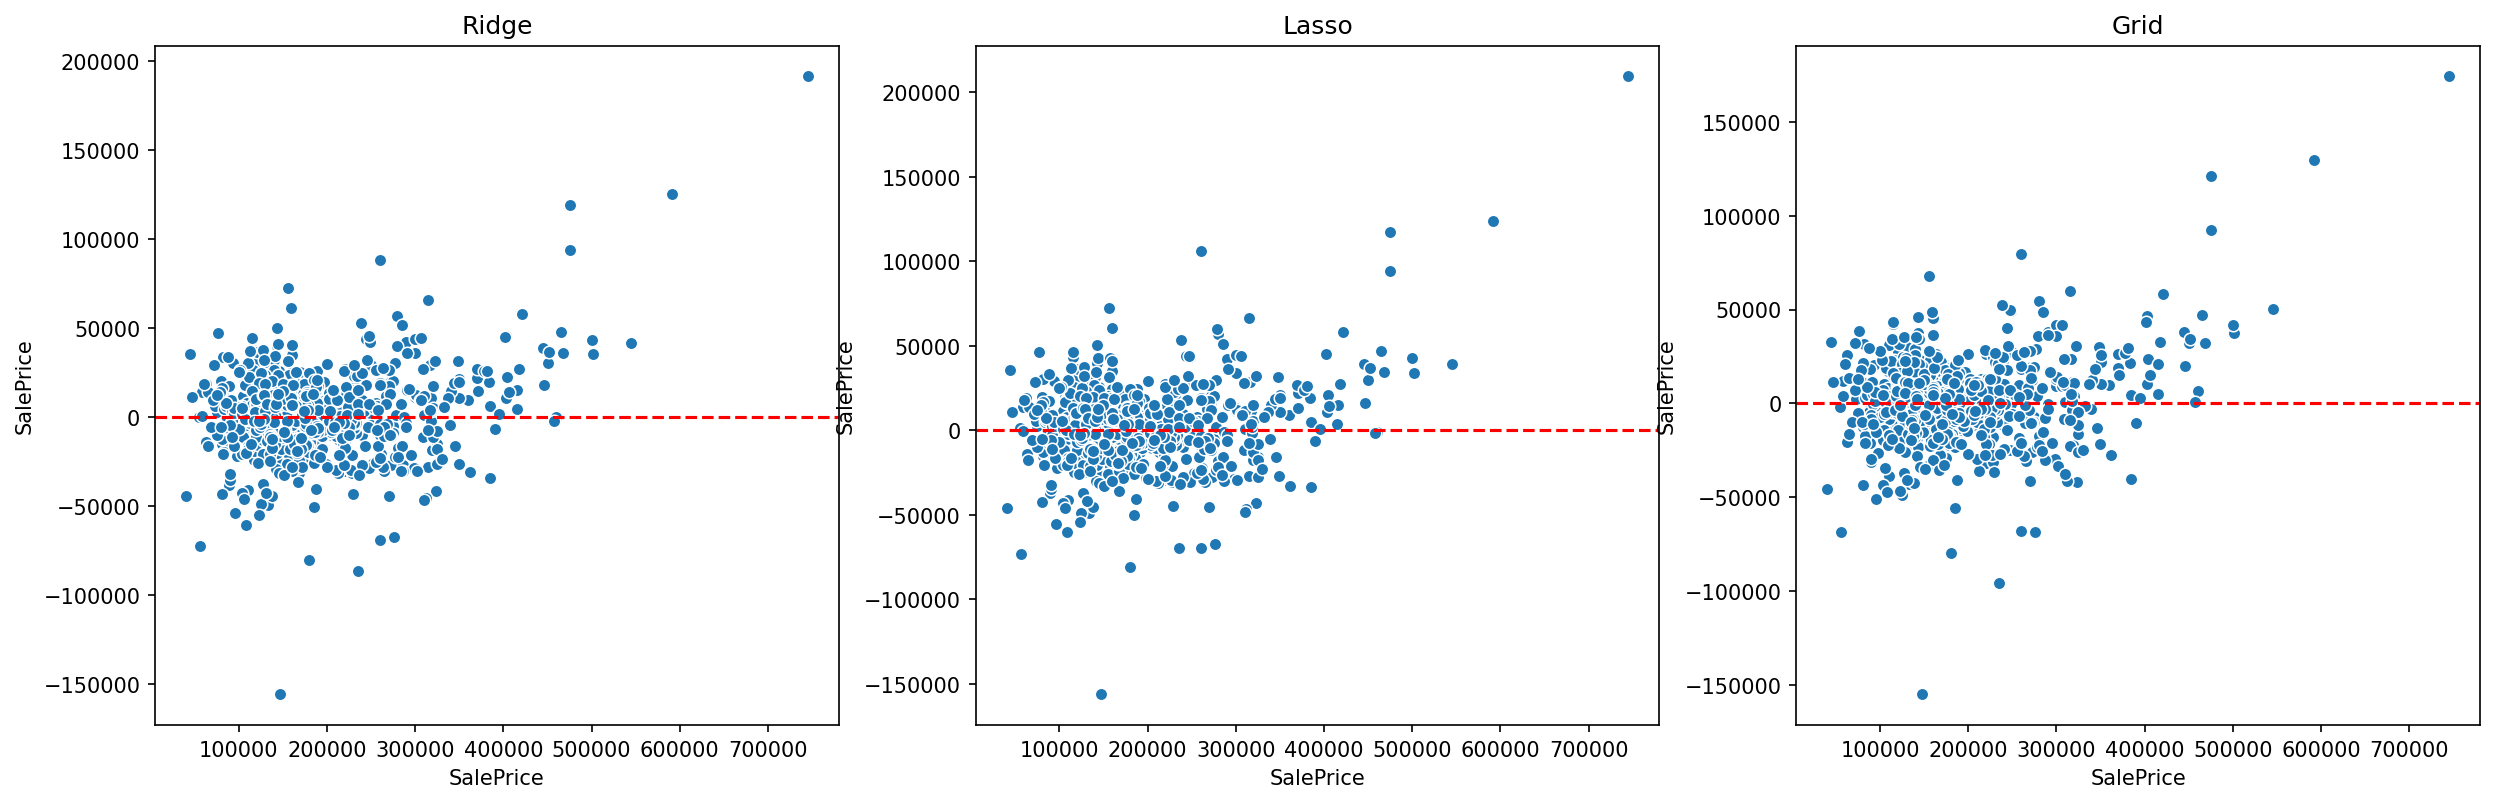

In [17]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)
sns.scatterplot(ax=axes[0], x=y_test, y=ridge_residuals)
sns.scatterplot(ax=axes[1], x=y_test, y=lasso_residuals)
sns.scatterplot(ax=axes[2], x=y_test, y=grid_residuals)

axes[0].set_title("Ridge")
axes[1].set_title("Lasso")
axes[2].set_title("Grid")

axes[0].axhline(y=0, color='r', linestyle='--')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[2].axhline(y=0, color='r', linestyle='--')

Text(0.5, 1.0, 'Grid')

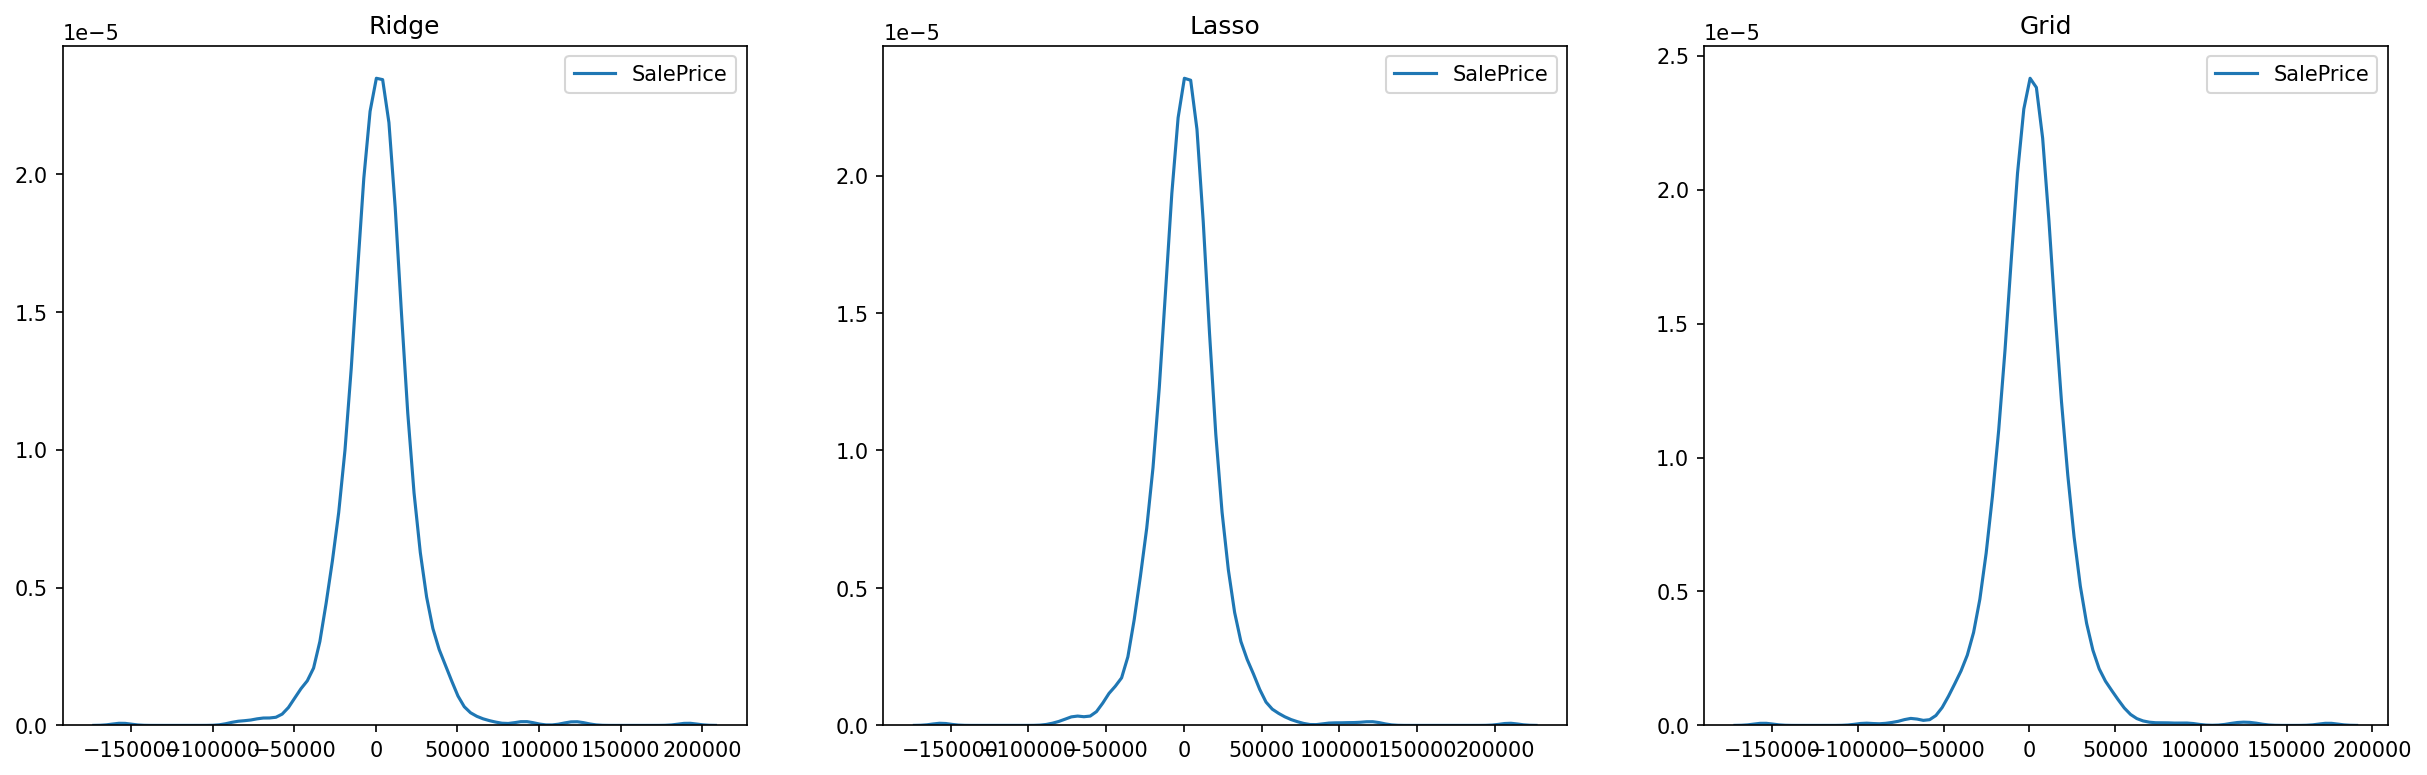

In [18]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)

sns.kdeplot(ax=axes[0], data=ridge_residuals)
sns.kdeplot(ax=axes[1], data=lasso_residuals)
sns.kdeplot(ax=axes[2], data=grid_residuals)

axes[0].set_title("Ridge")
axes[1].set_title("Lasso")
axes[2].set_title("Grid")

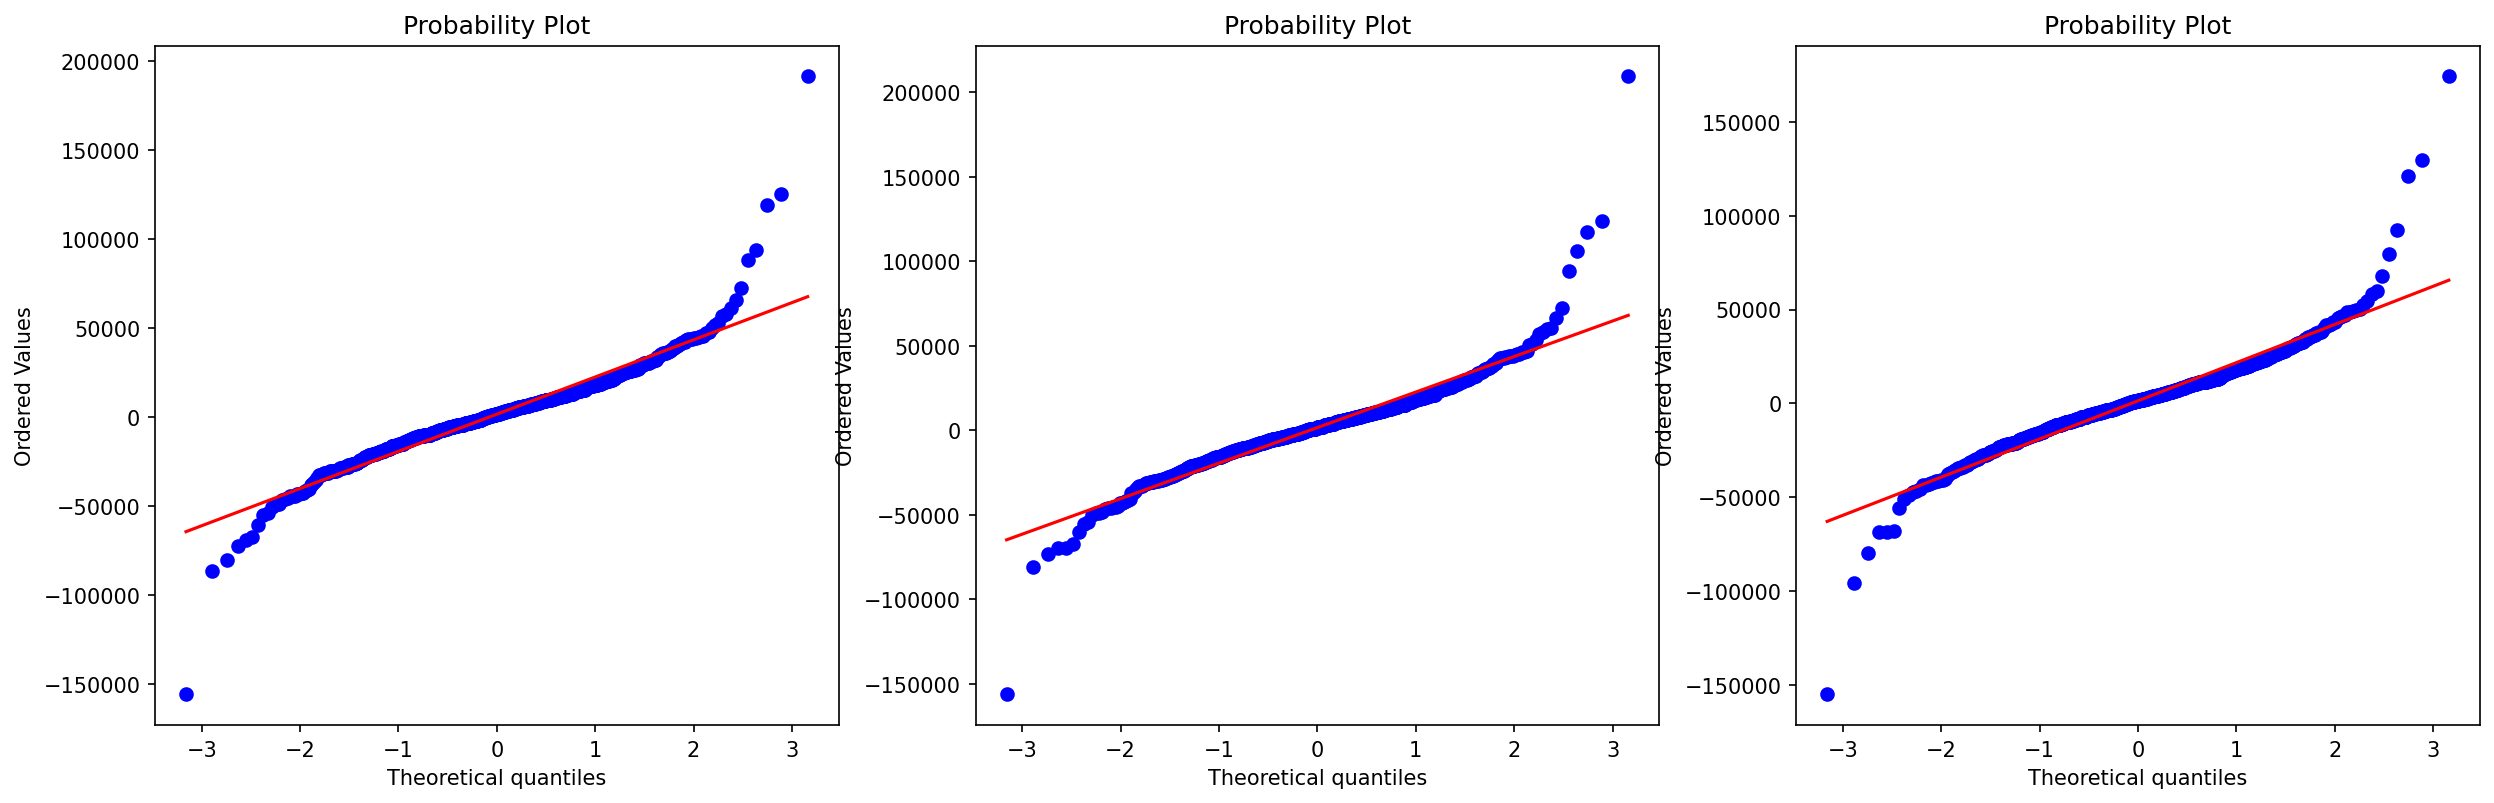

In [19]:
import scipy as sp

fig, axes = plt.subplots(1,3, figsize=(20, 6), dpi=150)
_ = sp.stats.probplot(ridge_residuals, plot=axes[0])
_ = sp.stats.probplot(lasso_residuals, plot=axes[1])
_ = sp.stats.probplot(grid_residuals, plot=axes[2])

There is not a big difference between the performance of Ridge, Lasso and ElasticNet with adjusted parameters. The last one seems to have a little improvement.

In [20]:
print(f"Grid RMSE {grid_RMSE}. Mean SalePrice {ames_df['SalePrice'].mean()}")

Grid RMSE 21448.278158226087. Mean SalePrice 180815.53743589742


In [21]:
max_sale = ames_df['SalePrice'].max()
min_sale = ames_df['SalePrice'].min()
diff_sale = max_sale - min_sale

normalized_ridge_rmse = ridge_RMSE / diff_sale
normalized_lasso_rmse = lasso_RMSE / diff_sale
normalized_grid_rmse = grid_RMSE / diff_sale

print(f"Normalized Ridge RMSE {normalized_ridge_rmse}")
print(f"Normalized Lasso RMSE {normalized_lasso_rmse}")
print(f"Normalized Grid RMSE {normalized_grid_rmse}")

# The lower RMSE is for the GridSearchCV -ElasticNet

Normalized Ridge RMSE 0.029699658843407705
Normalized Lasso RMSE 0.030060542030090714
Normalized Grid RMSE 0.028897817680182708
